In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))


10_Property_stolen_and_recovered.csv
1713_2991_bundle_archive
1713_2991_bundle_archive.zip
20_Victims_of_rape.csv
25_Complaints_against_police.csv
28_Trial_of_violent_crimes_by_courts.csv
29_Period_of_trials_by_courts.csv
30_Auto_theft.csv
31_Serious_fraud.csv
32_Murder_victim_age_sex.csv
33_CH_not_murder_victim_age_sex.csv
35_Human_rights_violation_by_police.csv
36_Police_housing.csv
39_Specific_purpose_of_kidnapping_and_abduction.csv
40_01_Custodial_death_person_remanded.csv
40_02_Custodial_death_person_not_remanded.csv
40_03_Custodial_death_during_production.csv
40_04_Custodial_death_during_hospitalization_or_treatment.csv
40_05_Custodial_death_others.csv
42_Cases_under_crime_against_women.csv
43_Arrests_under_crime_against_women.csv
communities-crime-clean.csv
communities-crime-full.csv
crime
poptable.csv



In [2]:
crimes1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [3]:
crimes = pd.concat([crimes1,crimes2],  ignore_index=False, axis=0)

In [4]:
# rename the STATE/UT column to STATE
crimes.rename(columns={'STATE/UT':'STATE'}, inplace=True)

In [5]:
# delete data sets post concat
del crimes1
del crimes2

In [6]:
print('Dataset is ready....')
# know the shape of dataset
crimes.shape

Dataset is ready....


(9840, 10)

In [7]:
# collect the state names in a list and print
states = crimes.STATE.unique()
print(states)

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry']


In [8]:
# do some data cleansing on state names

for i in range(0, len(states)):
    states[i] = states[i].lower()
    
for j in range(0, len(states)):
    if states[j] == 'a & n islands':
       states[j] = 'a&n islands'
    
    if  states[j] == 'd & n haveli':
        states[j] = 'd&n haveli'
      
print(states)

['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhya pradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamil nadu'
 'tripura' 'uttar pradesh' 'uttarakhand' 'west bengal' 'a&n islands'
 'chandigarh' 'd&n haveli' 'daman & diu' 'delhi' 'lakshadweep'
 'puducherry' 'andhra pradesh' 'arunachal pradesh' 'assam' 'bihar'
 'chhattisgarh' 'goa' 'gujarat' 'haryana' 'himachal pradesh'
 'jammu & kashmir' 'jharkhand' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'sikkim' 'tamil nadu' 'tripura' 'uttar pradesh'
 'uttarakhand' 'west bengal' 'a&n islands' 'chandigarh' 'd&n haveli'
 'daman & diu' 'delhi ut' 'lakshadweep' 'puducherry']


In [9]:
# remove duplicate state names from the list
states = np.unique(states).tolist()

print(states)

['a&n islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'd&n haveli', 'daman & diu', 'delhi', 'delhi ut', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


In [10]:
# convert the state names to lower
crimes['STATE'] = crimes['STATE'].str.lower()
crimes.head(3)

,STATE,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhra pradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,andhra pradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,andhra pradesh,CHITTOOR,2001,27,34,14,112,83,186,0


In [11]:
# filter out the Total crimes for each State & UT

crimes_total = crimes[crimes['DISTRICT'] == 'TOTAL']

In [12]:
# drop DISTRCT Column as we do not intend to use at this point
crimes_total.drop('DISTRICT', axis=1, inplace=True)
# filter out the Total crimes for each State & UT for the year 2001
crimes_total_2001 = crimes_total[crimes_total['Year'] == 2001]
crimes_total_2001.drop('Year', axis=1, inplace=True)

/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
# Data of Rape crime committed in the year 2001 per state
x = crimes_total_2001['STATE'].values
y = crimes_total_2001['Rape'].values

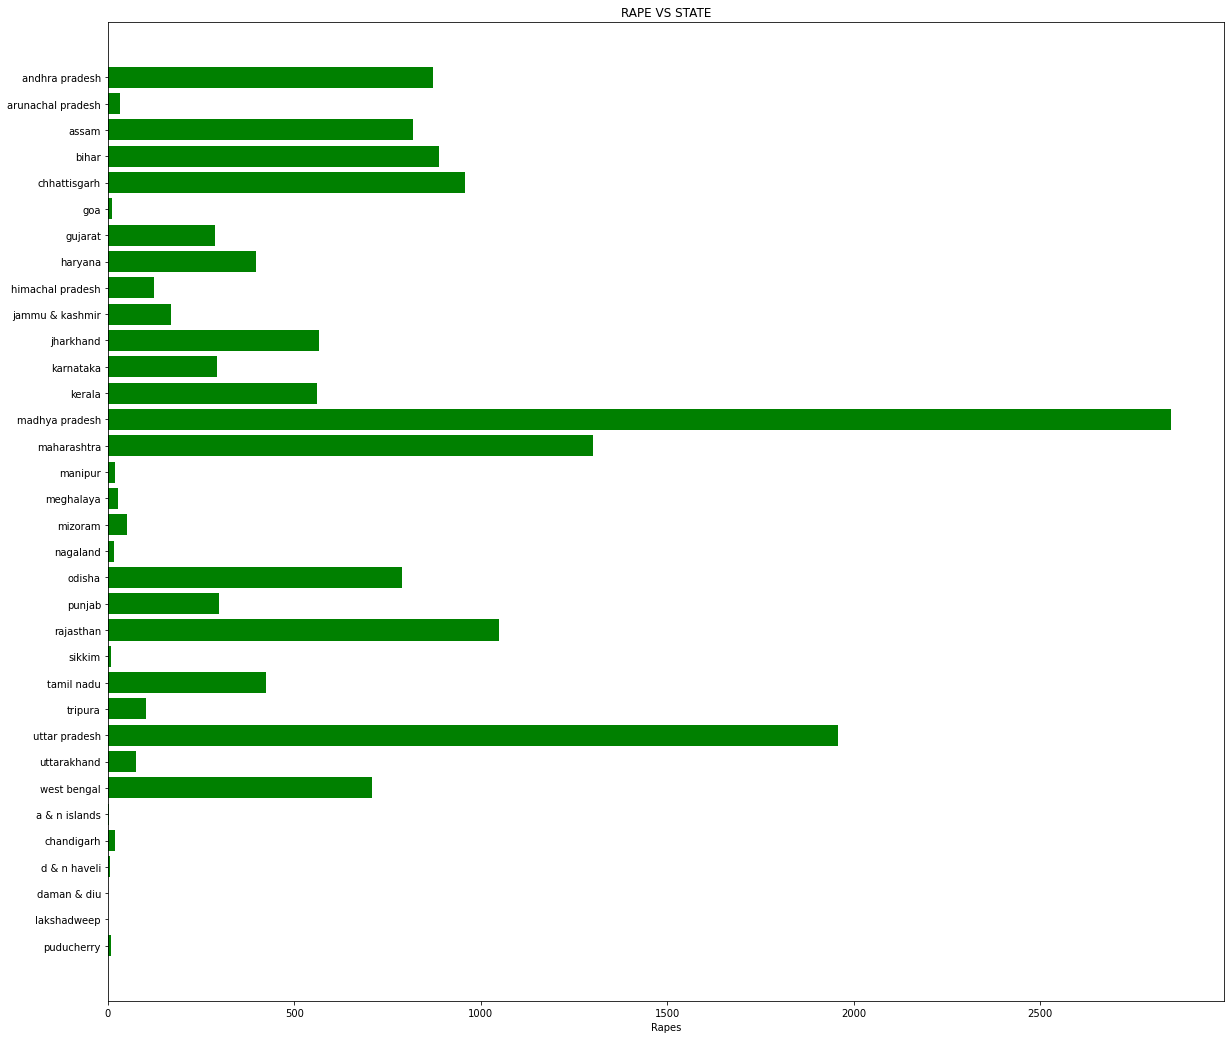

In [14]:
# plot the bar graph
fig, ax = plt.subplots()
crime_rape = crimes_total_2001['STATE'].values
y_pos = np.arange(len(crime_rape))
performance = crimes_total_2001['Rape'].values
ax.barh(y_pos, performance, align='center',color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(crime_rape)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rapes')
ax.set_title('RAPE VS STATE')
fig.set_size_inches(20, 18, forward=True)
plt.show()

In [16]:
# Any results you write to the current directory are saved as output.
# creating a new data set
crimes_total_women1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes_total_women2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [17]:
crimes_total_women = pd.concat([crimes_total_women1,crimes_total_women2],  ignore_index=False, axis=0)
crimes_total_women.rename(columns={'STATE/UT':'STATE'}, inplace=True)

del crimes_total_women1
del crimes_total_women2

In [18]:
# calculating total crimes of all kinds in each state from 2001 to 2013
crimes_total_women = crimes_total_women[crimes_total_women['DISTRICT'] == 'TOTAL']
crimes_total_women.drop('DISTRICT', axis=1, inplace=True)

crimes_total_women['Total Crimes']= crimes_total_women.iloc[:, -9:-1].sum(axis=1)

crimes_total_women = crimes_total_women.groupby(['STATE'])['Total Crimes'].sum()

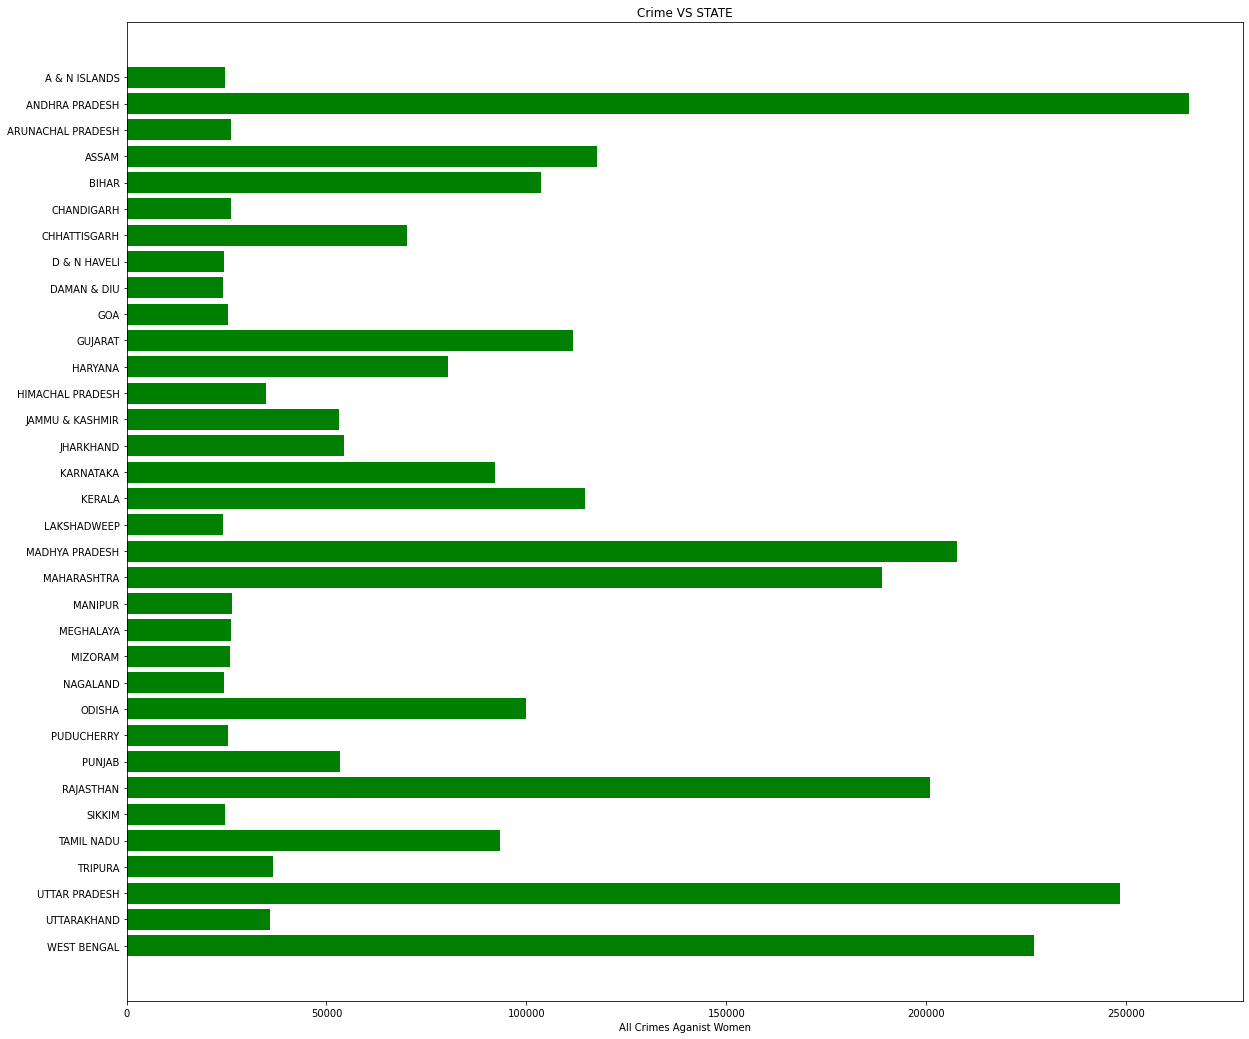

In [19]:
# plot graph of crimes committed on women since 2001-2013 in each state/ UT
fig1, ax1 = plt.subplots()
states = crimes_total_women.index.tolist()
y_pos = np.arange(len(states))
performance = crimes_total_women.tolist()
ax1.barh(y_pos, performance, align='center',color='green', ecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(states)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('All Crimes Aganist Women')
ax1.set_title('Crime VS STATE')
fig1.set_size_inches(20, 18, forward=True)
plt.show()

# Data for Analysis & Accuracy

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
rape_data = pd.read_csv('input/20_Victims_of_rape.csv')
state_geo = pd.read_csv('input/poptable.csv')
#rape_data.rename(columns={'Area_Name': 'State'}, inplace=True)
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [22]:
state_geo.head()

,Unnamed: 0,State.Name,latitude,longitude
0,1,ANDAMAN AND NICOBAR,11.667026,92.735983
1,2,ANDHRA PRADESH,14.750429,78.570026
2,3,ARUNACHAL PRADESH,27.100399,93.616601
3,4,ASSAM,26.749981,94.216667
4,5,BIHAR,25.785414,87.479973


In [23]:
rape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
Area_Name                    1050 non-null object
Year                         1050 non-null int64
Subgroup                     1050 non-null object
Rape_Cases_Reported          1050 non-null int64
Victims_Above_50_Yrs         1050 non-null int64
Victims_Between_10-14_Yrs    1050 non-null int64
Victims_Between_14-18_Yrs    1050 non-null int64
Victims_Between_18-30_Yrs    1050 non-null int64
Victims_Between_30-50_Yrs    1050 non-null int64
Victims_of_Rape_Total        1050 non-null int64
Victims_Upto_10_Yrs          1050 non-null int64
dtypes: int64(9), object(2)
memory usage: 90.3+ KB


In [24]:
'''def set_value(row_number, assigned_value): 
    return assigned_value[row_number]'''

latitude_mapping = {"Andaman & Nicobar Islands": 11.7400867, "Andhra Pradesh":15.91, "Arunachal Pradesh":28.21, "Assam":26.20, "Bihar":25.09
                , "Chandigarh":30.7333, "Chhattisgarh":21.27, "Dadra & Nagar Haveli":20.1809, "Daman & Diu":20.4283, "Delhi":28.7041, "Goa":15.29, "Gujarat":22.25
                , "Haryana":29.05, "Himachal Pradesh":31.10, "Jammu & Kashmir":33.77, "Jharkhand":23.61, "Karnataka":15.31, "Kerala":10.85,
                "Lakshadweep":10,"Madhya Pradesh":22.97,"Maharashtra":19.75,"Manipur":24.66,"Meghalaya":25.46,"Mizoram":23.16,"Nagaland":26.15,"Odisha":20.95,"Puducherry":11.9416,
                "Punjab":31.14,"Rajasthan":27.02,"Sikkim":27.53,"Tamil Nadu":11.12,"Tripura":23.94,"Uttar Pradesh":26.84,"Uttarakhand":30.06,"West Bengal":22.98}

#event_dictionary ={'Music' : 1500, 'Poetry' : 800, 'Comedy' : 1200} 
    
# Add a new column named 'Price' 
#df['Price'] = df['Event'].apply(set_value, args =(event_dictionary, )) 
#rape_data['Latitude'] = rape_data['Area_Name'].apply(set_value, args=(latitude_mapping))


rape_data['Latitude'] = rape_data['Area_Name'].map(latitude_mapping)
  

#print(rape_data) 

'''for dataset in rape_data.iteritems():
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].map(latitude_mapping)
    #dataset[1] = dataset[1].map(latitude_mapping)
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].fillna(0)'''
    
rape_data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Latitude
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0,11.740087
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0,11.740087
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0,11.740087
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0,11.740087
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,11.740087


In [25]:
rape_data.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
Latitude                     0
dtype: int64

In [26]:
longitude_mapping = {"Andaman & Nicobar Islands": 92.6586, "Andhra Pradesh":79.74, "Arunachal Pradesh":94.72, "Assam":92.93, "Bihar":85.31
                , "Chandigarh":76.7794, "Chhattisgarh":81.86, "Dadra & Nagar Haveli":73.0169, "Daman & Diu":72.8397, "Delhi":77.1025, "Goa":74.12, "Gujarat":71.19
                , "Haryana":76.08, "Himachal Pradesh":77.17, "Jammu & Kashmir":76.57, "Jharkhand":85.27, "Karnataka":75.71, "Kerala":76.27,
                "Lakshadweep":72.1833,"Madhya Pradesh":78.65,"Maharashtra":75.71,"Manipur":93.90,"Meghalaya":91.36,"Mizoram":92.93,"Nagaland":94.56,"Odisha":85.09,"Puducherry":79.8083,
                "Punjab":75.34,"Rajasthan":74.21,"Sikkim":88.51,"Tamil Nadu":78.65,"Tripura":91.98,"Uttar Pradesh":80.94,"Uttarakhand":79.01,"West Bengal":87.85}

rape_data['Longitude'] = rape_data['Area_Name'].map(longitude_mapping)

<AxesSubplot:>

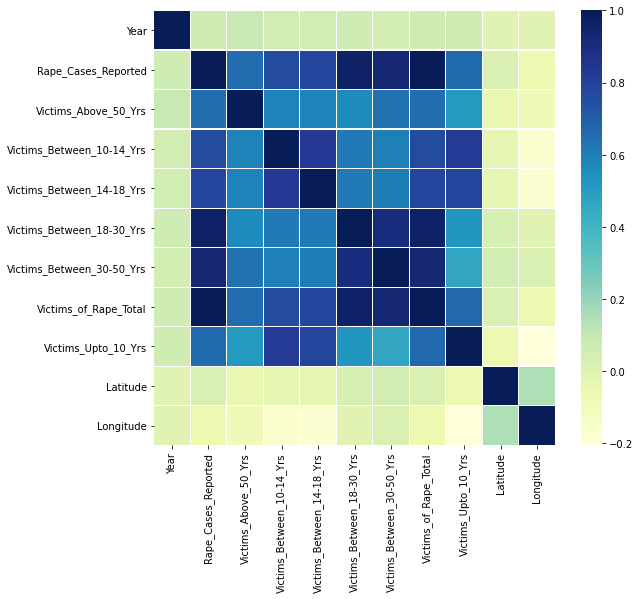

In [27]:
#sns.pairplot(rape_data, vars=["Rape_Cases_Reported", "Victims_Above_50_Yrs","Victims_Between_10-14_Yrs", "Victims_Between_14-18_Yrs","Victims_Between_18-30_Yrs","Victims_Between_30-50_Yrs"])
corrmat = rape_data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

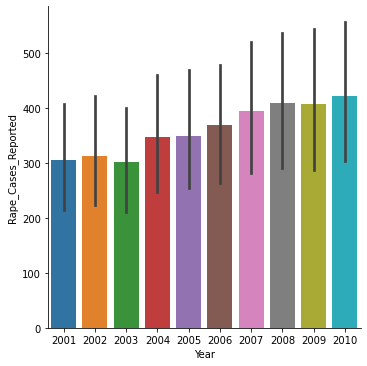

In [28]:
sns.catplot(x="Year", y="Rape_Cases_Reported", data=rape_data, kind='bar')

# Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [37]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('input/communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)


In [39]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cross_val_accuracy is  [0.79       0.875      0.83       0.84924623 0.65326633 0.75879397
 0.84924623 0.7839196  0.79396985 0.79899497]
cross_val_accuracy_avg is  0.7982437185929648


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=precision, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cross_val_precision is  [0.78231293 0.85211268 0.84210526 0.88       0.75454545 0.88118812
 0.85185185 0.94565217 0.79166667 0.85123967]
cross_val_precision_avg is  0.8432674799594686


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=recall, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cross_val_recall is  [0.92  0.968 0.896 0.88  0.664 0.712 0.92  0.696 0.912 0.824]
cross_val_recall_avg is  0.8392


In [40]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


In [41]:
DT_acc = accuracy_score(Y,y_pred)*100
#print(DT_acc)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=None, scoring=accuracy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=None, scoring=accuracy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=None, scoring=accuracy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=None, scoring=accuracy as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3

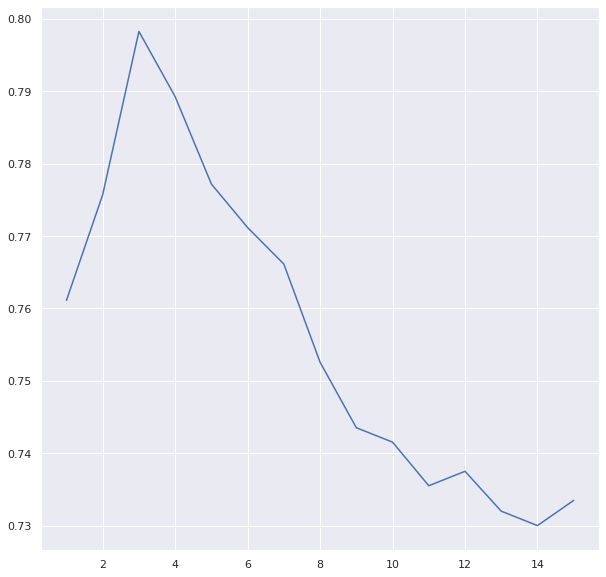

 [0.7611130653266331, 0.7756934673366834, 0.7982437185929648, 0.7892412060301508, 0.777178391959799, 0.7711658291457286, 0.7661306532663317, 0.7525753768844221, 0.743540201005025, 0.7415452261306533, 0.7355301507537689, 0.7375251256281408, 0.7320175879396984, 0.7300276381909548, 0.7335100502512564]


In [42]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

In [43]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [34  5 44  3]
4_max_normalized_feature is  [0.02389245 0.04512009 0.3620976  0.08646058]
34
feature_name[index] is  PctEmplManu
5
feature_name[index] is  racePctHisp
44
feature_name[index] is  PctKids2Par
3
feature_name[index] is  racePctWhite


# NaiveBayes-Gaussian

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)

mislabel num is  442


In [45]:
ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])


ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv


In [46]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]
cross_val_accuracy_avg is  0.761608040201005
cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]
cross_val_precision_avg is  0.9117998148278733
cross_val_recall is  [0.76  0.736 0.76  0.744 0.56  0.528 0.768 0.576 0.76  0.728]
cross_val_recall_avg is  0.692


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=recall, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [47]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 77.82237832413446
Precesion is 93.16239316239316
Recall is 69.76


In [48]:
GNB_acc = accuracy_score(Y,y_pred)*100

# K-NN

In [49]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('input/communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)

In [50]:
x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

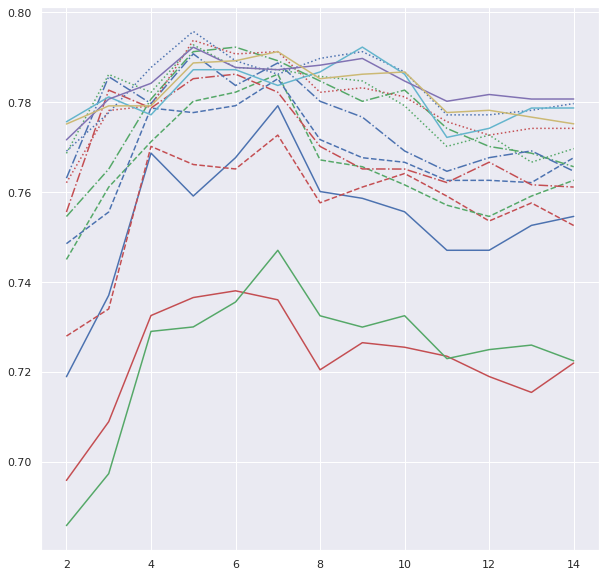

In [51]:
plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

In [52]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_
pca.explained_variance_ratio_
pcdf = pca.transform(initial)
pcdf

array([[ 0.42940989, -0.53929962,  0.31031454,  0.614929  , -0.78039899],
       [-1.19933196, -0.90092286,  0.31801595,  0.06578607,  0.08519118],
       [-1.25540273, -0.45223119, -0.37326947, -0.57765156, -0.34191676],
       ...,
       [-0.39828125, -0.04847062, -0.72054898,  1.849037  ,  0.50341926],
       [-0.06739216, -0.87415147,  0.57794267,  0.14245356, -0.03894212],
       [-0.53794345, -0.94270676, -0.04992508,  0.22885672,  0.51675884]])

In [53]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 87.0279146141215
Accuracy is 84.14450577019569
Precision is 89.3760539629005
Recall is 84.8


In [54]:
KNN_acc = accuracy_score(Y,y_pred)*100

In [55]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/user/anaconda3/lib/python3.7/site-pac

Cross validation accuracy is 79.57286432160804
Cross validation precision is 85.35884460774638
Cross validation recall is 81.60000000000001


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=recall, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# Boosted Decesion Tree

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)

In [58]:
AdaBoost.fit(initial, Y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=1, n_estimators=400)

In [59]:
prediction = AdaBoost.score(initial, Y)

In [60]:
print('The accuracy is: ',prediction*100,'%')

The accuracy is:  97.99297541394883 %


In [61]:
BoostedDT = prediction*100

# RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 100.0
Precesion is 100.0
Recall is 100.0


In [65]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=accuracy, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cross_val_accuracy is  [0.805      0.875      0.85       0.82914573 0.70351759 0.73366834
 0.80904523 0.79899497 0.7839196  0.8241206 ]
cross_val_accuracy_avg is  0.8012412060301507


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=precision, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cross_val_precision is  [0.77777778 0.88059701 0.85074627 0.84328358 0.85       0.86666667
 0.82706767 0.94845361 0.78       0.84126984]
cross_val_precision_avg is  0.8465862428806282


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass groups=0        7
1       10
2        3
3        8
4        1
5        6
6        2
7        1
8        7
9       10
10       4
11       2
12       5
13       1
14       3
15       2
16       9
17       4
18       5
19      10
20       4
21       1
22       7
23       8
24       5
25       8
26       2
27       8
28       2
29       6
        ..
1963     4
1964     6
1965     6
1966     4
1967     7
1968    10
1969     3
1970     8
1971     6
1972     9
1973     4
1974     2
1975     8
1976     6
1977     2
1978     6
1979     7
1980     9
1981     6
1982     3
1983     9
1984     6
1985     8
1986     4
1987     6
1988     9
1989     9
1990     3
1991     7
1992     8
Name: fold, Length: 1993, dtype: int64, scoring=recall, cv=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cross_val_recall is  [0.928 0.936 0.928 0.904 0.648 0.704 0.864 0.736 0.912 0.856]
cross_val_recall_avg is  0.8416


In [66]:
RF_acc = accuracy_score(Y,y_pred)*100

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 85.24836929252383
Precesion is 88.36276083467095
Recall is 88.08


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
LR_acc = accuracy_score(Y,y_pred)*100

# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)


In [75]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', LR_acc)
from sklearn.metrics import precision_score
print ('Precesion is', LR_acc)
from sklearn.metrics import recall_score
print ('Recall is', LR_acc)

Accuracy is 85.24836929252383
Precesion is 85.24836929252383
Recall is 85.24836929252383


# Comparsion

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  # Remove the CWD from sys.path while we load stuff.


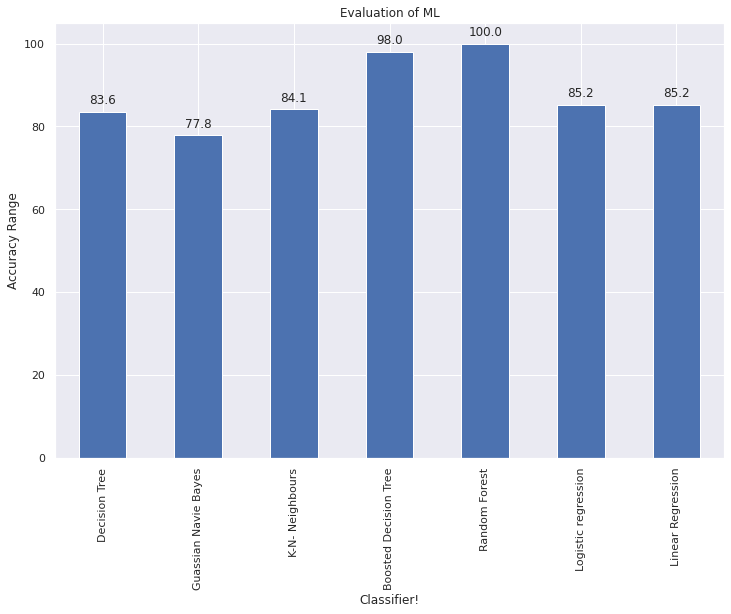

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [DT_acc,GNB_acc,KNN_acc,BoostedDT,RF_acc,LR_acc,LR_acc]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['Decision Tree', 'Guassian Navie Bayes','K-N- Neighbours','Boosted Decision Tree','Random Forest','Logistic regression','Linear Regression']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")